###### This notebook will abalyze an A/B test from the popular mobile puxxle game, cookie Cats. It is part of the DataCamp project (https://www.datacamp.com/projects/184)

In [8]:
#importing

import pandas as pd


%matplotlib inline

In [9]:
#reading the input file

df = pd.read_csv("inputData/cookie_cats.csv")

#Looking at the fist few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [10]:
#checking for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [11]:
#counting the number of players in each group: gate_30 and gate_40

df.groupby('version')['version'].count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [18]:
#Visualizing the player behavior by plotting the distribution of game rounds

df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

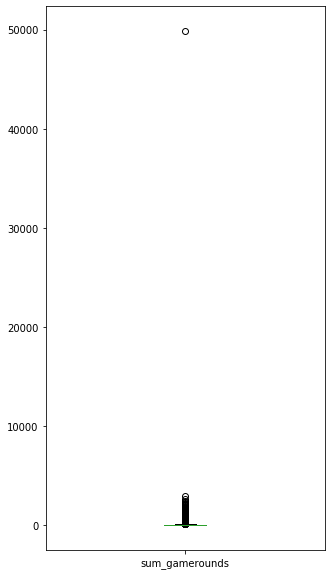

In [19]:
df['sum_gamerounds'].plot.box(figsize=(5,10))

In [20]:
#As seen in the above blox plot, one of the use played around 50K rounds during the first 7 days of game installation
#Therefore, grouping and counting the number of players for each number of gamerounds

totalGameRounds_df = df.groupby('sum_gamerounds')['userid'].count()
totalGameRounds_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

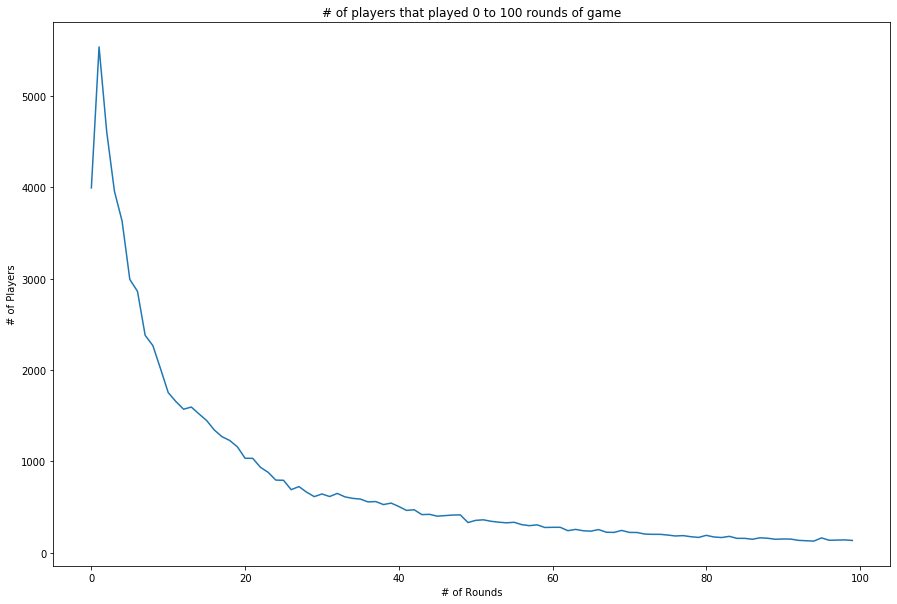

In [26]:
#Plotting the distribution of players that playes 0 to 100 rounds of game

ax = totalGameRounds_df[:100].plot(figsize=(15,10))
ax.set_xlabel("# of Rounds")
ax.set_ylabel("# of Players")
ax.set_title("# of players that played 0 to 100 rounds of game");


In [27]:
#Calculating mean 1-day retention for each group: gate_30 and gate_40

df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Text(0.5, 0, 'Mean 1-Day Retention')

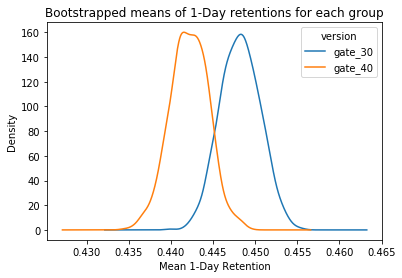

In [29]:
# There is a slight difference in mean between both groups which does not give us confidence 
#that gate_30 is better than gate_40. Performing a bootstrap mean for both group's 1 day retention for 1000 iterations

bootStrapMeanOneDay = []

for i in range(1000):
    mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    bootStrapMeanOneDay.append(mean)
    
# Transforming the list to a DataFrame
bootStrapMeanOneDay = pd.DataFrame(bootStrapMeanOneDay)
    
# A Kernel Density Estimate plot of the bootstrap distributions
ax = bootStrapMeanOneDay.plot.kde()
ax.set_title('Bootstrapped means of 1-Day retentions for each group')
ax.set_xlabel('Mean 1-Day Retention')

Text(0.5, 0, '% difference in Means')

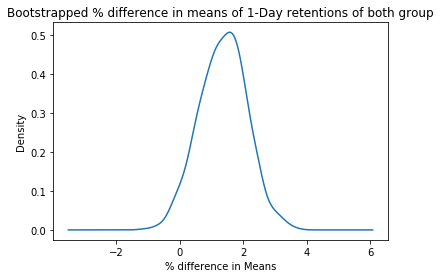

In [30]:
#Looking into detail for the % difference bwtween two groups; Adding a column for the difference

bootStrapMeanOneDay['diff'] = (bootStrapMeanOneDay.gate_30 - bootStrapMeanOneDay.gate_40) / bootStrapMeanOneDay.gate_40 * 100


# A Kernel Density Estimate plot of the % difference bootstrap distributions
ax = bootStrapMeanOneDay['diff'].plot.kde()
ax.set_title('Bootstrapped % difference in means of 1-Day retentions of both group')
ax.set_xlabel('% difference in Means')




In [32]:
#From the above graph we can say that majority times % difference is greater than zero which adds to the confidence
#of choosing gate_30
#Calculating the probability that the 1-day retention is better when the gate is at level 30

(bootStrapMeanOneDay['diff'] > 0).mean()

0.963

In [33]:
#Doing a similar analysis for 7-day retention

#Calculating mean 7-days retention for each group: gate_30 and gate_40

df.groupby('version')['retention_7'].mean()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Text(0.5, 0, 'Mean 7-Days Retention')

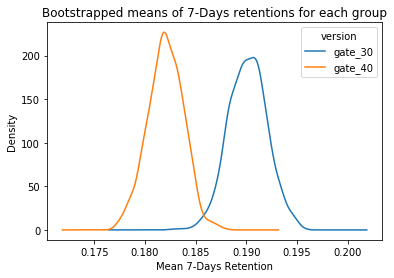

In [34]:
#Similar to 1-day retention, here too the mean of gate_30 is more than that of gate_40
#Applying the bootstrap approach for 7-days retention

bootStrapMeanSevenDays = []

for i in range(1000):
    mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    bootStrapMeanSevenDays.append(mean)
    
# Transforming the list to a DataFrame
bootStrapMeanSevenDays = pd.DataFrame(bootStrapMeanSevenDays)
    
# A Kernel Density Estimate plot of the bootstrap distributions
ax = bootStrapMeanSevenDays.plot.kde()
ax.set_title('Bootstrapped means of 7-Days retentions for each group')
ax.set_xlabel('Mean 7-Days Retention')

Text(0.5, 0, '% difference in Means')

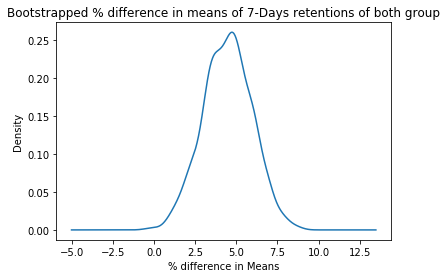

In [35]:
#Looking into detail for the % difference bwtween two groups; Adding a column for the difference

bootStrapMeanSevenDays['diff'] = (bootStrapMeanSevenDays.gate_30 - bootStrapMeanSevenDays.gate_40) / bootStrapMeanSevenDays.gate_40 * 100


# A Kernel Density Estimate plot of the % difference bootstrap distributions
ax = bootStrapMeanSevenDays['diff'].plot.kde()
ax.set_title('Bootstrapped % difference in means of 7-Days retentions of both group')
ax.set_xlabel('% difference in Means')


In [36]:
#From the above graph we can say that majority times % difference is greater than zero which adds to the confidence
#of choosing gate_30
#Calculating the probability that the 1-day retention is better when the gate is at level 30

(bootStrapMeanSevenDays['diff'] > 0).mean()

0.998

###### By seeing the % difference between the bootstrapped means of both the groups for both 1-day and 7-days retention period, we can conclude that the gate should be placed at level 40 rather than level 40.